**Importing The Required Libraries**

In [98]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

You should consider upgrading via the '/Users/shres/personal_projects/drowsiness_detect/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/shres/personal_projects/drowsiness_detect/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/shres/personal_projects/drowsiness_detect/venv/bin/python3 -m pip install --upgrade pip' command.


In [99]:
!pip install opencv-python
import tensorflow as tf 
import cv2 as cv
import os


test_path="Dataset/New_Test/New_Test"

You should consider upgrading via the '/Users/shres/personal_projects/drowsiness_detect/venv/bin/python3 -m pip install --upgrade pip' command.


just a sample (to check whether it's working or not)


---



In [101]:
img = cv.imread("./Dataset/New_Test/New_Test/Closed_Eyes/s0012_00309_0_0_0_0_0_01.png",cv.IMREAD_GRAYSCALE) 
plt.show(img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

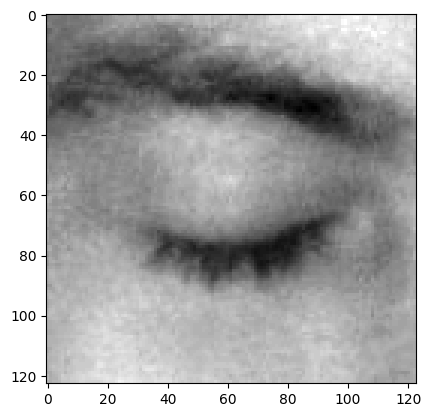

In [102]:
Datadirectory= test_path   #training dataset
Classes=["Closed_Eyes","Open_Eyes"]   #list of classes
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

Resizing the image to size 224

---



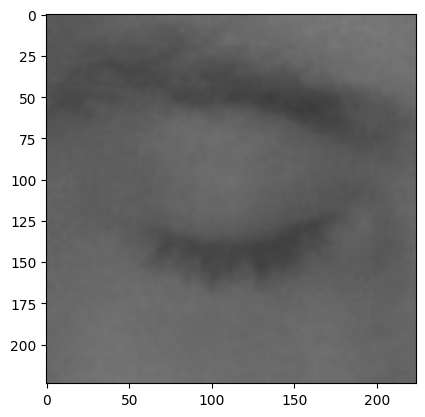

In [103]:
img_size=224

new_array = cv.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

#reading all the images and converting them into an array for data and labels

In [104]:
training_Data = []
def create_training_Data():
    for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category) # 0 1,
      for img in os.listdir(path):
        try: 
          img_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE)
          backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
          new_array = cv.resize(backtorgb, (img_size,img_size))
          training_Data.append([new_array,class_num])
        except Exception as e:
          pass

In [105]:
create_training_Data()

In [106]:
print(len(training_Data))

3000


In [107]:
import random
random.shuffle(training_Data)

In [108]:
X = []
y = []

for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)



In [109]:
X.shape

(3000, 224, 224, 3)

In [110]:
#normalizing the data
X= X/255.0; ## normalizing data

In [111]:
Y=np.array(y)

In [112]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [113]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# deep learning model for training - Training learning

In [114]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2 

In [123]:
model=tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3))

In [124]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

**Transfer Learning**


In [127]:
base_input = model.input
print(base_input)

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_651>


In [128]:
base_output = model.layers[-4].output
print(base_output)

<KerasTensor shape=(None, 1, 1, 1024), dtype=float32, sparse=False, name=keras_tensor_738>


In [129]:
Flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [130]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [131]:
new_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

**Settings for binary classification(open / closed)**

In [159]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [ ]:
new_model.fit(X, Y, epochs= 8,validation_split=0.1)   
# also try training the model for 20 epochs & check the predictions (prediction=0 for closed eyes & prediction=1 for open eyes)

Epoch 1/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 927ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 0.9967 - val_loss: 0.0301
Epoch 2/8
50/85 ━━━━━━━━━━━━━━━━━━━━ 32s 930ms/step - accuracy: 0.9988 - loss: 0.0050

In [134]:
new_model.save('my_model2.h5')

**Loading the model**

---



In [136]:
import tensorflow as tf
new_model = tf.keras.models.load_model('my_model2.h5')

**Check the network for predictions**

**LET'S CHECK ON UNKNOWN IMAGES**

In [137]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2 


img_size=224
img_array = cv2.imread('Images/img2.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb =cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [75]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [138]:
X_input.shape

(1, 224, 224, 3)

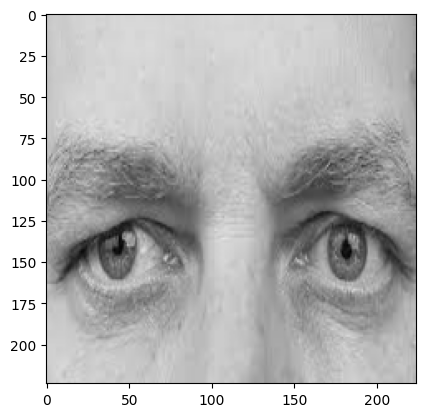

In [139]:
plt.imshow(new_array)

In [140]:
X_input=X_input/255.0

In [141]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


In [142]:
prediction

array([[0.87958616]], dtype=float32)

In [143]:
img = cv2.imread('Images/img4.jpg')

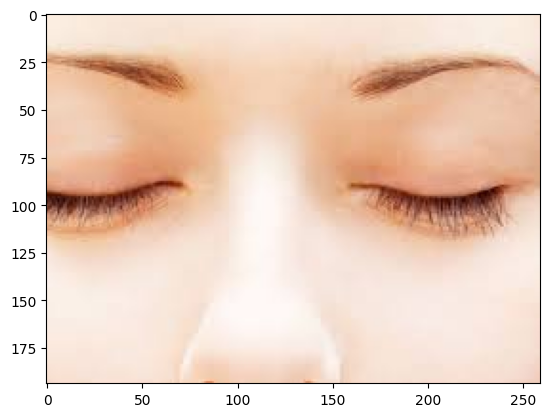

In [144]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [145]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [146]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [147]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [148]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [149]:
for(x,y,w,h) in eyes:
  cv2.rectangle(img,(x, y), (x+w, y+h), (0, 255, 0), 2)

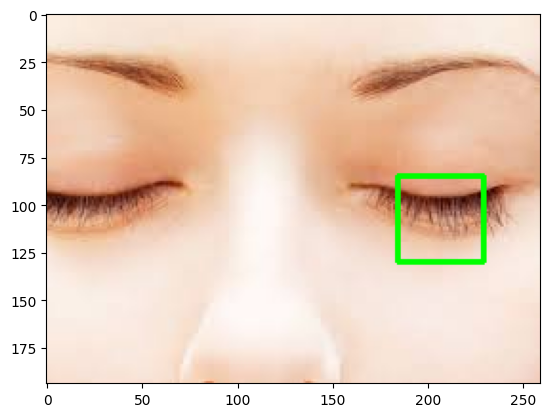

In [150]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Cropping the eye image**

In [151]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascode.empty()) 
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes are not detected")
  else:
    for (ex,ey, ew,eh) in eyess:
      eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]


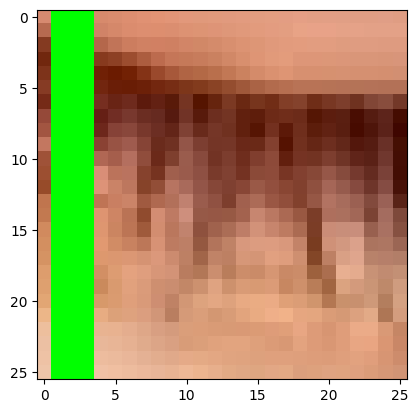

In [152]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [153]:
eyes_roi.shape

(26, 26, 3)

In [154]:
final_image = cv2.resize(eyes_roi, (224, 224)) 
final_image = np.expand_dims(final_image, axis =0) 
final_image=final_image/255.0





In [155]:
final_image.shape

(1, 224, 224, 3)

In [157]:
new_model.predict(final_image)  # 0 --> closed  & 1 --> open

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.9914145]], dtype=float32)